# Project 3: Implementing a Simple Recurrent Neural Network (RNN)

## Introduction

In this project, you will design, implement, and evaluate a simple Recurrent Neural Network (RNN) from scratch. This will involve building the entire pipeline, from data preprocessing to model training and evaluation.

## Objectives

1. Set up TensorFlow or PyTorch environments. You are free to choose your preferred DL platform.
2. Use GPU for training.
3. Create a data loader and implement data preprocessing where needed.
4. Design a Convolutional Neural Network.
5. Train and evaluate your model. Make sure to clearly show loss and accuracy values. Include visualizations too.
6. Answer assessment questions.

## Dataset

You are free to choose any dataset for this project! Kaggle would be a good source to look for datasets. Below are some examples:
- Daily Minimum Temperatures in Melbourne: This dataset contains the daily minimum temperatures in Melbourne, Australia, from 1981 to 1990.
- Daily Bitcoin Prices: This dataset contains historical daily prices of Bitcoin, which can be used for time series forecasting projects.
- Text8 Dataset: This dataset consists of the first 100 million characters from Wikipedia. It's great for text generation or language modeling tasks.
- IMDB Movie Reviews: This dataset contains 50,000 movie reviews for sentiment analysis, split evenly into 25,000 training and 25,000 test sets.
- Jena Climate Dataset: This dataset records various weather attributes (temperature, pressure, humidity, etc.) every 10 minutes, making it ideal for time series analysis.
- Earthquake Aftershocks: This dataset contains seismic data, suitable for predicting aftershocks following major earthquakes.


## 1. Tensorflow SetUp

Already done from previous labs

## 2. GPU Usage

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


## 3. Data Loader and Data Preprocessing


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

num_words = 10000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 2s 0us/step


## 4. Model Design


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(num_words, 128, input_length=max_len))
model.add(SimpleRNN(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          1280000   
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               32896     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1313025 (5.01 MB)
Trainable params: 1313025 (5.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. Model Training & Evaluation

In [4]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
313/313 [==============================] - 157s 492ms/step - loss: 0.6652 - accuracy: 0.5872 - val_loss: 0.6145 - val_accuracy: 0.6428
Epoch 2/10
313/313 [==============================] - 144s 460ms/step - loss: 0.5326 - accuracy: 0.7379 - val_loss: 0.6394 - val_accuracy: 0.6136
Epoch 3/10
313/313 [==============================] - 140s 446ms/step - loss: 0.5755 - accuracy: 0.7065 - val_loss: 0.6047 - val_accuracy: 0.6660
Epoch 4/10
313/313 [==============================] - 139s 444ms/step - loss: 0.4716 - accuracy: 0.7714 - val_loss: 0.5175 - val_accuracy: 0.7694
Epoch 5/10
313/313 [==============================] - 137s 438ms/step - loss: 0.3847 - accuracy: 0.8377 - val_loss: 0.5726 - val_accuracy: 0.7342
Epoch 6/10
313/313 [==============================] - 135s 430ms/step - loss: 0.3626 - accuracy: 0.8411 - val_loss: 0.5515 - val_accuracy: 0.7784
Epoch 7/10
313/313 [==============================] - 135s 433ms/step - loss: 0.3409 - accuracy: 0.8471 - val_loss: 0.6379 -

In [5]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_acc}')

782/782 [==============================] - 30s 38ms/step - loss: 0.6055 - accuracy: 0.7706
Test Loss: 0.6055183410644531, Test Accuracy: 0.7706400156021118


## Visualizations

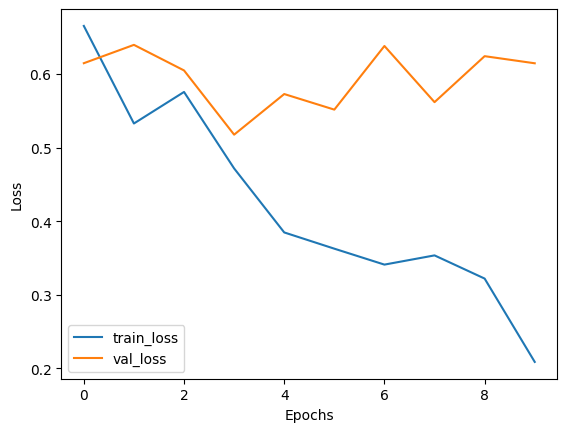

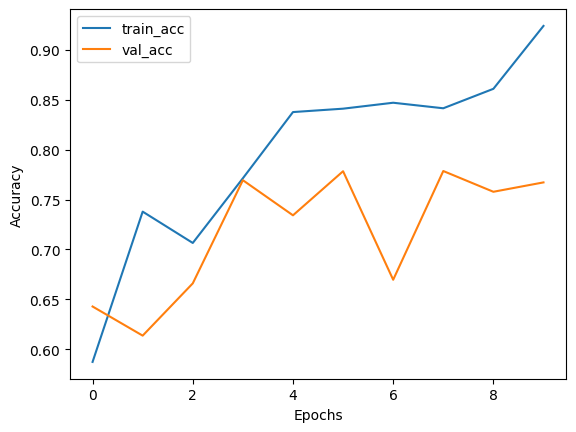

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


---
### Questions
Answer the following questions in detail.

1. What is a Recurrent Neural Network (RNN)? Describe its key components and how they differ from those in a feedforward neural network.
2. Explain the purpose of the recurrent connection in an RNN. How does it enable the network to handle sequential data?
3. What are vanishing and exploding gradients, and how do they affect the training of RNNs?
4. Describe the Long Short-Term Memory (LSTM) network and its key components. How does it address the issues of vanishing and exploding gradients?
5. What is the purpose of the GRU (Gated Recurrent Unit) in RNNs? Compare it with LSTM.
6. Explain the role of the hidden state in an RNN. How is it updated during the training process?
7. What are some common evaluation metrics used to assess the performance of an RNN on a sequential task, such as language modeling or time series forecasting?
8. How does data preprocessing impact the performance of RNNs? Provide examples of preprocessing steps for text and time series data.
9. What is sequence-to-sequence learning in the context of RNNs, and what are its applications?
10. How can RNNs be used for anomaly detection in time series data? Describe the general approach.


## 6. Assessement Questions:


1.A Recurrent Neural Network (RNN) is designed to handle sequential data by maintaining a state that captures information from previous inputs. Unlike feedforward neural networks, RNNs have connections forming directed cycles, enabling memory retention over time. Key components of an RNN include the input layer, hidden layer, and output layer. The hidden layer updates its state at each time step based on the current input and the previous state, while the output layer produces outputs at each time step. RNNs differ from feedforward networks by having recurrent connections and shared parameters across time steps, allowing them to learn temporal patterns in the data.

2.The recurrent connection in an RNN allows the network to maintain a hidden state that captures information from previous inputs in the sequence. This hidden state is updated at each time step based on the current input and the previous hidden state. This capability enables RNNs to handle sequential data effectively, as they can learn dependencies and patterns that occur over time. For example, in language modeling, the meaning of a word can depend on the preceding words, and the recurrent connection enables the RNN to capture this context, improving its performance on tasks involving sequential data.

3.Vanishing and exploding gradients are issues that arise during the training of deep neural networks, including RNNs. Vanishing gradients occur when the gradients used to update the weights become very small, leading to slow learning or stagnation. Exploding gradients occur when the gradients become excessively large, causing instability and divergence during training. These problems hinder the training of RNNs by making it difficult to learn long-term dependencies. Vanishing gradients limit the network's ability to remember information from earlier time steps, while exploding gradients can make the training process unstable and unpredictable.

4.The Long Short-Term Memory (LSTM) network addresses vanishing and exploding gradients with a complex architecture that includes gating mechanisms to regulate information flow. Key components of LSTM include the cell state, which acts as a long-term memory; the forget gate, which discards unnecessary information; the input gate, which adds new information to the cell state; and the output gate, which controls the output based on the cell state. These gates use sigmoid activations to decide what information to keep, discard, and output. By managing the flow of information, LSTMs can maintain long-term dependencies, effectively addressing the issues of vanishing and exploding gradients.

5.The Gated Recurrent Unit (GRU) simplifies the LSTM architecture while achieving similar performance. GRUs combine the forget and input gates into a single update gate and merge the cell state and hidden state. Key components include the update gate, which manages information updates, and the reset gate, which controls the influence of past information. Compared to LSTMs, GRUs have fewer gates and parameters, making them computationally efficient. GRUs often perform similarly to LSTMs on various tasks, and their simpler structure allows for faster training, making them a suitable alternative when computational efficiency is critical.

6.The hidden state in an RNN serves as the network's memory, capturing information from previous inputs in the sequence. It is updated at each time step using the current input and the previous hidden state. The update is governed by the RNN's weights and activation functions. During training, the hidden state is updated through backpropagation through time (BPTT), where the gradients of the loss with respect to the hidden states and weights are calculated and used to update the parameters using an optimizer.

7.Common evaluation metrics for RNNs depend on the task. For language modeling, perplexity and cross-entropy loss are used to measure how well the model predicts sequences of words. For time series forecasting, metrics like Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) are common. For classification tasks such as sentiment analysis, accuracy, precision, recall, and F1-score are used to evaluate the model's performance.

8.Data preprocessing is crucial for RNN performance as it ensures the input data is in a suitable format and improves model convergence and accuracy. For text data, preprocessing steps include tokenization, lowercasing, removing punctuation, stemming/lemmatization, padding/truncating sequences, and converting tokens to indices. For time series data, preprocessing involves normalization/standardization, handling missing values, creating lag features, and smoothing. Proper preprocessing helps the RNN learn effectively from the data, leading to better performance.


9.Sequence-to-sequence learning involves training RNNs to convert sequences from one domain to sequences in another. This technique is widely used in applications like machine translation, where the model translates sentences from one language to another, and in text summarization, where long texts are condensed into shorter summaries. Sequence-to-sequence models typically use encoder-decoder architectures, where the encoder processes the input sequence and the decoder generates the output sequence, often utilizing attention mechanisms to improve performance.

10.RNNs can be used for anomaly detection in time series data by learning the normal patterns and identifying deviations. The general approach involves training an RNN on historical data to predict future values. During inference, the model predicts values for new data, and anomalies are detected by comparing predicted values with actual values. Significant deviations indicate potential anomalies. The RNN's ability to capture temporal dependencies makes it suitable for detecting unusual patterns and outliers in time series data.

---
### Submission
Submit a link to your completed Jupyter Notebook (e.g., on GitHub (private) or Google Colab) with all the cells executed, and answers to the assessment questions included at the end of the notebook.